#**IBM Statistics for Data Science - Final Project**

Name: Benjamin Pace

Date: 2022-06-17

#**Data Description and Tasks**

Tasks To Complete:

1. Is there a significant difference in the median value of houses bounded by the Charles river or not?
2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Data Variable Descriptions:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000
11. PTRATIO - pupil-teacher ratio by town
12. LSTAT - % lower status of the population
13. MEDV - Median value of owner-occupied homes in $1000's

#**Load and Preprocess Data**


## Import Packages and Initialize File Paths

In [1]:
##########
# ### Import Libraries and Setup Paths

# import packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.formula.api as sm

# initialize inpaths and outpaths
boston_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv"

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load in Boston Housing Data (Tasks 1-3)

In [2]:
##########
# ### Load in Boston Housing Data (Task 1-3)

# 506 obs, 14 var
boston_0 = pd.read_csv(boston_url, encoding="utf-8",
                       dtype=str, header=0)

# drop redundant index column
boston_0 = boston_0.drop(columns=["Unnamed: 0"])

# convert all columns to lower
boston_0.columns = [col.lower() for col in list(boston_0.columns)]

# convert columns to float type
for col in list(boston_0.columns):
    boston_0[col] = boston_0[col].astype(float)

# Exploratory Analysis and Visualization (Task 4)

## Boxplot for Median Value of Owner-Occupied Homes

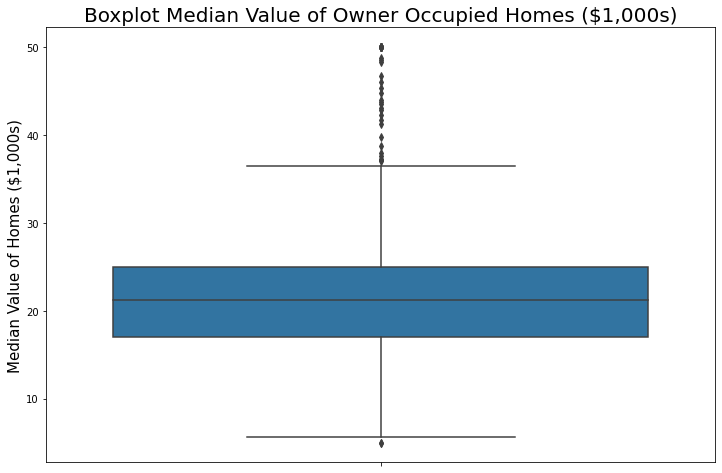

In [3]:
# boxplot for median value of owner-occupied homes
plt.figure(figsize=(12, 8))
boston_boxplot_0 = sns.boxplot(y="medv", data=boston_0)
boston_boxplot_0.set_title("Boxplot Median Value of Owner Occupied Homes ($1,000s)", fontsize=20)
boston_boxplot_0.set_ylabel("Median Value of Homes ($1,000s)", fontsize=15)
plt.show()

## Barplot for Count of Census Tracts That Bound Charles River

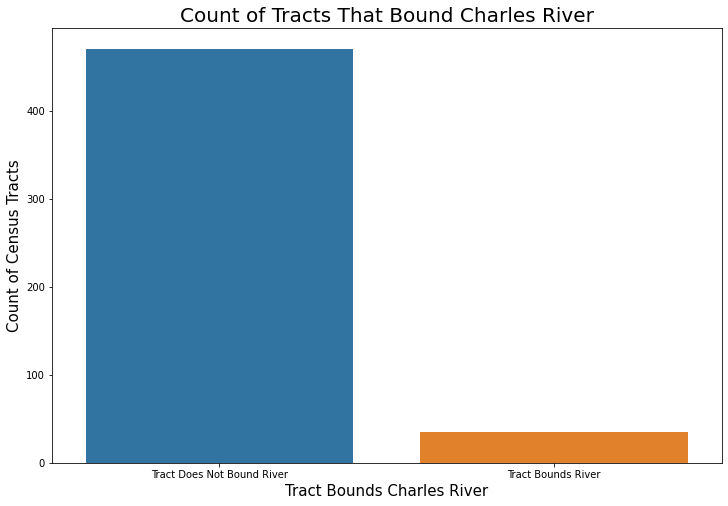

In [4]:
# generate summary for charles river barplot
charles_river_smry_0 = boston_0.groupby(["chas"]).agg({"indus": ["count"]}).copy()
charles_river_smry_0 = charles_river_smry_0.reset_index()
charles_river_smry_0.columns = ["charles_river", "tract_count"]

charles_river_smry_0["charles_river"] = np.where((charles_river_smry_0["charles_river"] == 1),
                                                 "Tract Bounds River",
                                                 "Tract Does Not Bound River")

# barplot of charles river
plt.figure(figsize=(12, 8))
boston_barplot = sns.barplot(x="charles_river", y="tract_count", data=charles_river_smry_0)
boston_barplot.set_title("Count of Tracts That Bound Charles River", fontsize=20)
boston_barplot.set_ylabel("Count of Census Tracts", fontsize=15)
boston_barplot.set_xlabel("Tract Bounds Charles River", fontsize=15)
# boston_barplot.bar_label(boston_barplot.containers[0])
plt.show()

## Boxplot Median Values of Owner Occupied Homes by Percent of Owner Occupied Homes Built Before 1940

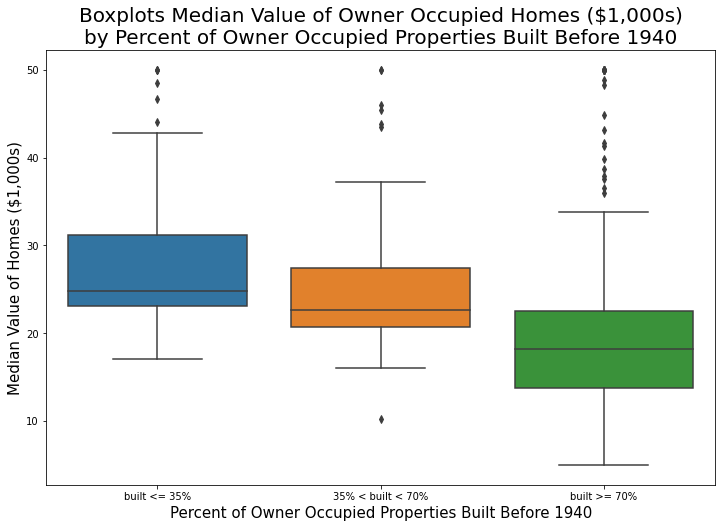

In [5]:
# add in age variable by categories
age_groups = [(boston_0["age"] <= 35),
              (boston_0["age"] > 35) & (boston_0["age"] < 70),
              (boston_0["age"] >= 70)]

age_values = ["built <= 35%",
              "35% < built < 70%",
              "built >= 70%"]

boston_0["age_cat"] = np.select(age_groups, age_values, default="check")

# convert to categorical
boston_0["age_cat"] = pd.Categorical(boston_0["age_cat"],
                                     categories=age_values,
                                     ordered=True)

# boxplot of median home value and percent of owner occupied properties built before 1940
plt.figure(figsize=(12, 8))
boston_boxplot_1 = sns.boxplot(x="age_cat", y="medv", data=boston_0)
boston_boxplot_1.set_title("Boxplots Median Value of Owner Occupied Homes ($1,000s)"
                           "\nby Percent of Owner Occupied Properties Built Before 1940", fontsize=20)
boston_boxplot_1.set_ylabel("Median Value of Homes ($1,000s)", fontsize=15)
boston_boxplot_1.set_xlabel("Percent of Owner Occupied Properties Built Before 1940", fontsize=15)
plt.show()

## Scatterplot of Nitric Oxide Concentration and Proportion of Non-Retail Business Acres

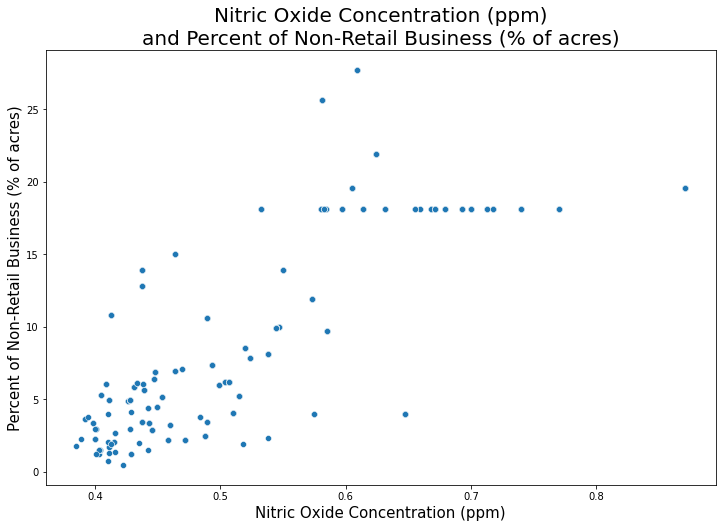

In [6]:
# scatter plot of nitric oxide concentration and proportion of non-retail business acres
plt.figure(figsize=(12, 8))
boston_scatter = sns.scatterplot(x="nox", y="indus", data=boston_0)
boston_scatter.set_title("Nitric Oxide Concentration (ppm)\nand Percent of Non-Retail Business (% of acres)", fontsize=20)
boston_scatter.set_ylabel("Percent of Non-Retail Business (% of acres)", fontsize=15)
boston_scatter.set_xlabel("Nitric Oxide Concentration (ppm)", fontsize=15)
plt.show()

## Histogram of Pupil-Teacher Ratio by Census Tract

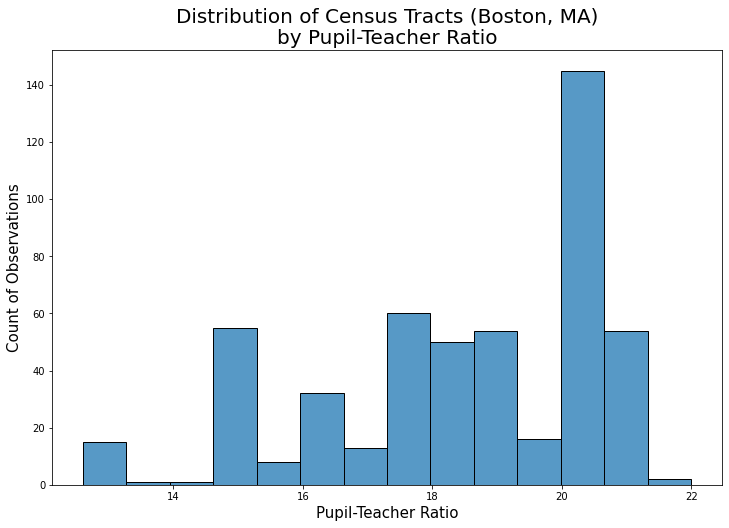

In [7]:
# histogram of pupil-teacher ratio by tract
plt.figure(figsize=(12, 8))
boston_scatter = sns.histplot(x="ptratio", data=boston_0)
boston_scatter.set_title("Distribution of Census Tracts (Boston, MA)\nby Pupil-Teacher Ratio", fontsize=20)
boston_scatter.set_ylabel("Count of Observations", fontsize=15)
boston_scatter.set_xlabel("Pupil-Teacher Ratio", fontsize=15)
plt.show()

# Statistical Tests (Task 5)

## T-Test to Determine Impact of Charles River

This t-test is to determine if there is a statistically significant difference in median value of census tracts bounded by the the Charles River or not.

1. Null Hypothesis: Our null hypothesis is that there is not a statistically significant difference in the median value of homes in census tracts bounded by the Charles River.

2. Results: As shown in the results below our p-value of 7.39*10^-5 is clearly less than our significance level of .05 so we reject the null hypothesis. There is a statistically significant difference in the median value of homes that are in census tracts bounded by the Charles River.

In [8]:
# use ttest_ind from scipy to perform a t-test
scipy.stats.ttest_ind(boston_0[(boston_0["chas"] == 1)]["medv"],
                      boston_0[(boston_0["chas"] == 0)]["medv"])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

## ANOVA Test to Determine Impact of Owner Occupied Units Built Pre-1940

This ANOVA test is to determine if there is a difference in the median values of houses broken out by the proportion of owner occupied units built prior to 1940.

1. Null Hypothesis: Our null hypothesis is that there is not a statistically significant difference in the median value of homes in census tracks broken out by the proportion of owner occupied units built prior to 1940.

2. Results: As shown in the results below our p-value of 1.71*10^-15 is clearly less than our significance level of .05 so we reject the null hypothesis. There is a statistically significant difference in the median value of homes when broken out by the proportion of owner occupied units built prior to 1940.

In [9]:
# generate lists to use in anova test
built_less_35 = boston_0[(boston_0["age_cat"] == "built <= 35%")]["medv"].tolist()
built_35_70 = boston_0[(boston_0["age_cat"] == "35% < built < 70%")]["medv"].tolist()
built_more_70 = boston_0[(boston_0["age_cat"] == "built >= 70%")]["medv"].tolist()

# run anova tests and print results
f_statistic, p_value = scipy.stats.f_oneway(built_less_35, built_35_70, built_more_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


## Pearson Correlation Test to Determine Nitric Oxide Impact

This Pearson correlation tests is to determine if there is no relationship between the nitric oxide concentrations and the proportion of non-retail business acres per census tract.

1. Null Hypothesis: Our null hypothesis is that there is not a statistically significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per census tract.

2. Results: As shown in the results below our p-value of 7.91e-98 is clearly less than our significance level of .05 so we reject the null hypothesis. There is a statistically significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per census tract.

In [10]:
# use pearsonr from scipy to perform a pearson correlation
scipy.stats.pearsonr(boston_0["indus"], boston_0["nox"])

(0.7636514469209151, 7.913361061238693e-98)

## Regression to Determine The Impact of Additional Distance to Boston Employment Centres

This regression is to determine the impact of an additional unit of distance to the five boston employment centres on the median value of owner occupied homes.

1. Null Hypothesis: Our null hypothesis is that there is no impact of an additional distance to the five boston employment centres on the median value of owner occupied homes.

2. Results: As shown in the results below our p-value for the dis coefficient is clearly less than our significance level of .05 so we reject the null hypothesis. Using this simple regression we estimate an impact of 1.0916 (in $1,000s) on the median home value of owner occupied homes for every increase of 1 in the units used by the weighted distance to the five boston employment centers.

In [11]:
reg_str = """medv ~ dis"""

reg_model_0 = sm.ols(formula=reg_str, data=boston_0)
reg_output_0 = reg_model_0.fit()
print(reg_output_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.21e-08
Time:                        19:23:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0